In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from matplotlib_venn import venn3

In [2]:
df_all=pd.read_pickle('common_data/fivepseq_abundance_tsr.pkl')
df_High=df_all[(df_all.High>1) & (df_all.Low==0)]
df_Low=df_all[(df_all.Low>1) & (df_all.High==0)]

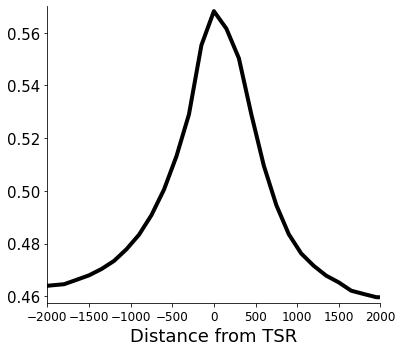

In [3]:
x=pd.read_csv('Supplemental_Figure2_data/Homerout_Nuc_thymus.txt',sep='\t')
x.columns=np.hstack(('Distance',x.columns[1:]))
x['GC']=x['C frequency']+x['G frequency']
plt.figure(figsize=(6,5))
sns.lineplot(x=x.Distance,y=x.GC,color='k',lw=4)
plt.xlim([-2000,2000])
plt.ylabel('GC%',fontsize=18)
plt.xlabel('Distance from TSR',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.ylim([0.4575,0.57])
sns.despine()
plt.tight_layout()
plt.ylabel('')
plt.savefig('Panels/Figure5A.pdf',transparent=True,dpi=500)
plt.show()
plt.close()

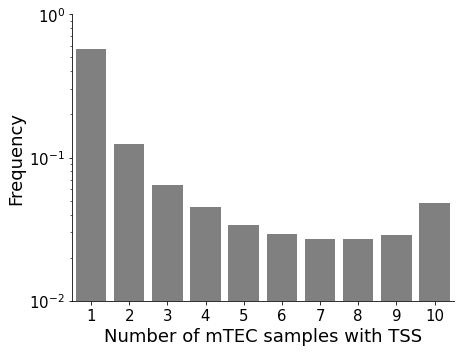

In [4]:
def barplot(df,feature,saveas,log=0):
    if feature=='Listing':
        a,b=np.unique(df[feature],return_counts=1)
    else:
        a,b=np.unique(df[feature].astype(str),return_counts=1)
    plt.figure(figsize=(6.5,5))   
    sns.barplot(x=a,y=b/b.sum(),color='gray')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    if log==1:
        plt.yscale('log')
    sns.despine()
    plt.ylabel('Frequency',fontsize=18)
    plt.xlabel('Number of mTEC samples with TSS',fontsize=18)
    plt.ylim(.01,1)
    plt.tight_layout()
    plt.savefig(saveas, transparent=True,dpi=500)
    plt.show()
    plt.close()
    
barplot(df_all,'Listing','Supplemental_Panels/SFig2B.pdf',log=1)

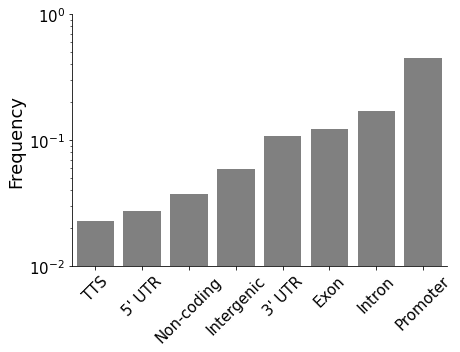

In [5]:
def barplot(df,feature,saveas,log=0):
    if feature=='Listing':
        a,b=np.unique(df[feature],return_counts=1)
    else:
        a,b=np.unique(df[feature].astype(str),return_counts=1)
    idx=np.argsort(b)
    plt.figure(figsize=(6.5,5))
    sns.barplot(x=a[idx],y=b[idx]/b[idx].sum(),color='gray')
    plt.xticks(np.arange(8),['TTS', "5' UTR", 'Non-coding', 'Intergenic', "3' UTR", 'Exon','Intron', 'Promoter'],fontsize=15,rotation=45)
    plt.yticks(fontsize=15)
    sns.despine()
    if log==1:
        plt.yscale('log')
    plt.ylabel('Frequency',fontsize=18)
    #plt.xlabel('Number of mTEC samples with TC',fontsize=18)
    plt.ylim(.01,1)
    plt.tight_layout()
    plt.savefig(saveas, transparent=True,dpi=500)
    plt.show()
    plt.close()
barplot(df_all,'Annotations_short','Supplemental_Panels/SFig2C.pdf',1)

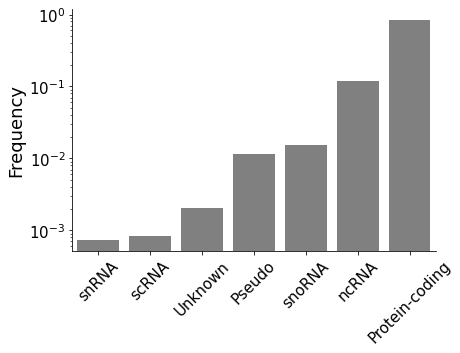

In [6]:
def barplot(df,feature,saveas,log=0):
    if feature=='Listing':
        a,b=np.unique(df[feature],return_counts=1)
    else:
        a,b=np.unique(df[feature].astype(str),return_counts=1)
    idx=np.argsort(b)
    plt.figure(figsize=(6.5,5))
    sns.barplot(x=a[idx],y=b[idx]/b[idx].sum(),color='gray')
    np.round(b[idx]/b[idx].sum())
    plt.xticks(np.arange(7),['snRNA', 'scRNA', 'Unknown', 'Pseudo', 'snoRNA', 'ncRNA','Protein-coding'],fontsize=15,rotation=45)
    plt.yticks(fontsize=15)
    sns.despine()
    if log==1:
        plt.yscale('log')
    plt.ylabel('Frequency',fontsize=18)
    #plt.xlabel('Number of mTEC samples with TC',fontsize=18)
    #plt.ylim(.01,1)
    plt.tight_layout()
    plt.savefig(saveas, transparent=True,dpi=500)
    plt.show()
    plt.close()
barplot(df_all,'Gene_Type','Supplemental_Panels/SFig2D.pdf',1)

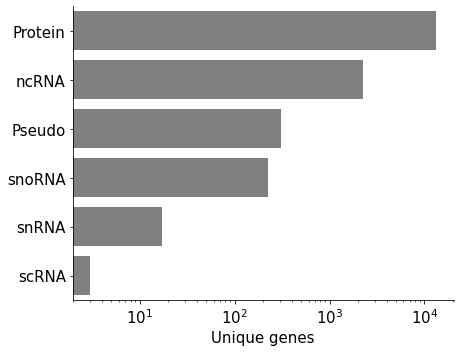

In [7]:
colors=sns.color_palette("Blues", 8)
order=['snRNA', 'scRNA', 'nan', 'pseudo', 'snoRNA', 'ncRNA','protein-coding']
c=dict(zip(order,colors))
x=[13322,2244,308,222,17,3]
y=['Protein','ncRNA','Pseudo','snoRNA','snRNA','scRNA']
y2=['protein-coding','ncRNA','pseudo','snoRNA','snRNA','scRNA']
plt.figure(figsize=(6.5,5))
sns.barplot(x=x,y=y,color='Gray')
plt.xscale('log')
sns.despine()
plt.xlabel('Unique genes',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig('Supplemental_Panels/SFig2E.pdf', transparent=True,dpi=500)